In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1.)
# plt.rcParams["font.size"] = 12

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [3]:
def smooth(y, f=0.05):
    """Applies box filter smoothing to array `y` with fraction `f`, yielding a smoothed array."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[1-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

In [4]:
def plot_pr_curve(px, py, ap, save_dir=Path("pr_curve.png"), names=()):
    """Plots precision-recall curve, optionally per class, saving to `save_dir`; `px`, `py` are lists, `ap` is Nx2
    array, `names` optional.
    """
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_aspect('equal')
    py = np.stack(py, axis=1)
    colors = ['#2C73D2', '#00C9A7']
    for i, y in enumerate(py.T):
        ax.plot(px, y, linewidth=1, label=f"{names[i]}, "+"AP$_{[0.5]}=$"+f"{ap[i, 0]:.3f}", color=colors[i])  # plot(recall, precision)

    ax.plot(px, py.mean(1), linewidth=3, color="#FF9671", label="All, mAP$_{[0.5]}$=%.3f" % ap[:, 0].mean())
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.legend(loc="lower left")
    # ax.set_title("Precision-Recall Curve")
    fig.tight_layout()
    fig.savefig(save_dir, dpi=250)
    fig.savefig(save_dir.with_suffix('.pdf'))
    # plt.close(fig)

In [5]:
def plot_mc_curve(px, py, angular_size, save_dir, names=(), ylabel="Metric", loc='best'):
    """Plots a metric-confidence curve for model predictions, supporting per-class visualization and smoothing."""
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_aspect('equal')
    # np.save(save_dir.with_name('names'), names)
    # print('names', names)
    colors = ['#2C73D2', '#00C9A7']
    for i, y in enumerate(py):
        ax.plot(px, y, linewidth=1, label=f"{names[i]}", color=colors[i])  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="#FF9671", alpha=0.8, label=f"All classes, {y.max():.2f} at {px[y.argmax()]:.3f}")
    ax.set_xlabel('Confidence')
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, 1.01)
    ax.set_ylim(0, 1.01)
    ax.legend(loc=loc)
    fig.tight_layout()
    fig.savefig(save_dir, bbox_inches='tight')

0.00025
0.00027


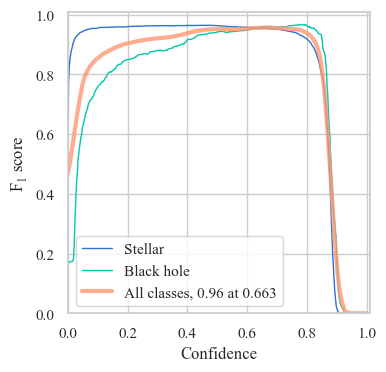

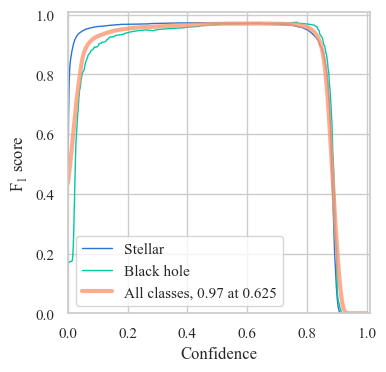

In [6]:
npy_path = Path('csv/np')
for i in npy_path.iterdir():
    # print(i.name
    if i.is_dir():
        px = np.load(i / 'x_F1.npy')
        py = np.load(i / 'y_F1.npy')
        # a = np.load(i)
        # print(a.shape)
    # px = np.load('csv/np/x_F1.npy')
    # py = np.load('csv/np/y_F1.npy')
        angular_size = float(i.name)
        plot_mc_curve(px, py, angular_size, names={0: 'Stellar', 1: 'Black hole'}, ylabel='F$_1$ score', save_dir=Path(f'images/F1_{i.name}.pdf'))
        print(angular_size)

0.00027


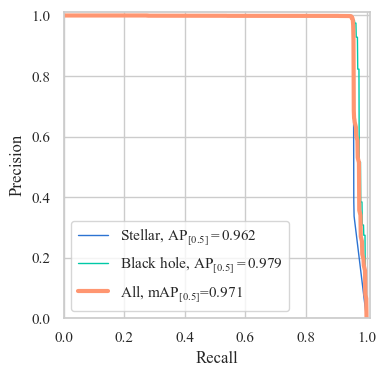

In [7]:
npy_path = Path('csv/np')
i = npy_path / '2.7e-4'
px = np.load(i / 'pr_x.npy')
py = np.load(i / 'pr_y.npy')
ap = np.load(i / 'pr_ap.npy')
# a = np.load(i)
# print(a.shape)
# px = np.load('csv/np/x_F1.npy')
# py = np.load('csv/np/y_F1.npy')
angular_size = float(i.name)
# plot_mc_curve(px, py, angular_size, names={0: 'Stellar', 1: 'Black hole'}, ylabel='F$_1$ score', save_dir=Path(f'images/F1_{i.name}.pdf'))
plot_pr_curve(px, py, ap, names={0: 'Stellar', 1: 'Black hole'}, save_dir=Path(f'images/PR_{i.name}.pdf'))
print(angular_size)

In [8]:
def plot_mc_curve(px, py, angular_size, save_dir, names=(), ylabel="Metric", loc='best'):
    """Plots a metric-confidence curve for model predictions, supporting per-class visualization and smoothing."""
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_aspect('equal')
    # np.save(save_dir.with_name('names'), names)
    # print('names', names)
    colors = ['#2C73D2', '#00C9A7']
    for i, y in enumerate(py):
        ax.plot(px, y, linewidth=1, label=f"{names[i]}", color=colors[i])  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="#FF9671", alpha=0.8, label=f"All classes")
    ax.set_xlabel('Confidence')
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc=loc)
    fig.tight_layout()
    fig.savefig(save_dir, bbox_inches='tight')

0.00025
0.00027


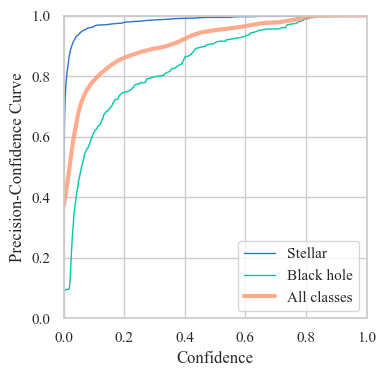

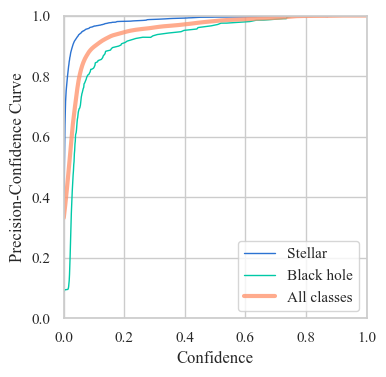

In [9]:
npy_path = Path('csv/np')
for i in npy_path.iterdir():
    # print(i.name
    if i.is_dir():
        px = np.load(i / 'x_Precision.npy')
        py = np.load(i / 'y_Precision.npy')
        # a = np.load(i)
        # print(a.shape)
    # px = np.load('csv/np/x_F1.npy')
    # py = np.load('csv/np/y_F1.npy')
        angular_size = float(i.name)
        plot_mc_curve(px, py, angular_size, names={0: 'Stellar', 1: 'Black hole'}, ylabel='Precision-Confidence Curve', save_dir=Path(f'images/PC_{i.name}.pdf'), loc='lower right')
        print(angular_size)

0.00025
0.00027


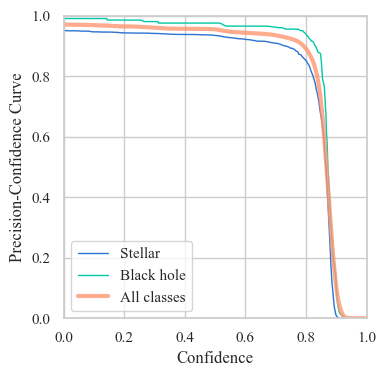

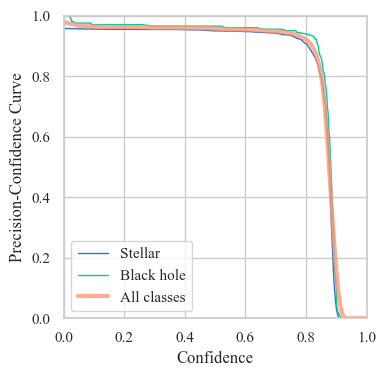

In [10]:
npy_path = Path('csv/np')
for i in npy_path.iterdir():
    # print(i.name
    if i.is_dir():
        px = np.load(i / 'x_Recall.npy')
        py = np.load(i / 'y_Recall.npy')
        # a = np.load(i)
        # print(a.shape)
    # px = np.load('csv/np/x_F1.npy')
    # py = np.load('csv/np/y_F1.npy')
        angular_size = float(i.name)
        plot_mc_curve(px, py, angular_size, names={0: 'Stellar', 1: 'Black hole'}, ylabel='Precision-Confidence Curve', save_dir=Path(f'images/RC_{i.name}.pdf'))
        print(angular_size)

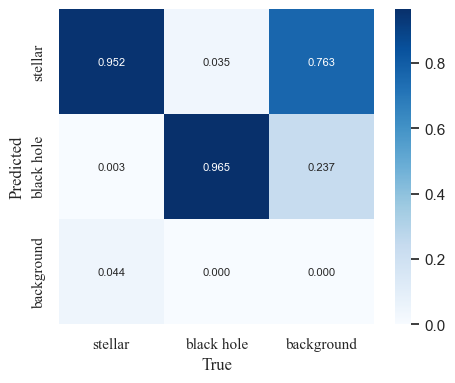

In [11]:
# load plots\csv\np\confusion_matrix.npy and plot confusion matrix
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

npy_path = Path('csv/np')

# print(i.name
cm = np.load(npy_path / 'confusion_matrix.npy')


fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
sns.set(font_scale=1.0)  # for label size
ticklabels = ['stellar', 'black hole', 'background']
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # suppress empty matrix RuntimeWarning: All-NaN slice encountered
    sns.heatmap(
        cm,
        ax=ax,
        annot=True,
        annot_kws={"size": 8},
        cmap="Blues",
        fmt=".3f",
        square=True,
        vmin=0.0,
        xticklabels=ticklabels,
        yticklabels=ticklabels,
    ).set_facecolor((1, 1, 1))
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
# ax.set_title("Confusion Matrix")
fig.tight_layout()
fig.savefig(Path('images') / "confusion_matrix.pdf")